# ***Deep Learning - CNN - ResNet Architecture***

# ***Mounting Google Drive***

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# ***Imports***

In [3]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image
print(os.listdir("../"))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras import initializers
from keras.preprocessing.image import ImageDataGenerator, load_img

['root', 'media', 'var', 'tmp', 'usr', 'dev', 'lib64', 'etc', 'proc', 'opt', 'sbin', 'lib', 'boot', 'sys', 'srv', 'run', 'bin', 'mnt', 'home', 'content', '.dockerenv', 'datalab', 'tools', 'swift', 'tensorflow-1.15.2', 'dlib-19.18.0-cp36-cp36m-linux_x86_64.whl', 'dlib-19.18.0-cp27-cp27mu-linux_x86_64.whl', 'lib32']


Using TensorFlow backend.


# ***Setting up Data Folders***

In [4]:
import zipfile
import os

content_location = '/content/'
pneumonia_zipfile_location = '/content/drive/My Drive/data/chest-xray-pneumonia.zip'
covid_zipfile_location = '/content/drive/My Drive/data/covid-chest-xray.zip'

with zipfile.ZipFile(pneumonia_zipfile_location, 'r') as zip_ref:
    zip_ref.extractall(content_location+'/data/')
print(os.listdir(content_location+'/data/'))

with zipfile.ZipFile(covid_zipfile_location, 'r') as zip_ref:
    zip_ref.extractall(content_location+'/data/')
print(os.listdir(content_location+'/data/'))

['chest_xray']
['images', 'chest_xray', 'metadata.csv']


In [5]:
mainDIR = os.listdir('/content/data/chest_xray/')
print(mainDIR)

['train', 'chest_xray', 'val', 'test', '__MACOSX']


In [0]:
train_folder= '/content/data/chest_xray/train/'
val_folder = '/content/data/chest_xray/val/'
test_folder = '/content/data/chest_xray/test/'

In [0]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

In [8]:
# EFFICIENT NET
import os
from shutil import copyfile
os.makedirs('images/NORMAL', exist_ok=True)
os.makedirs('images/PNEUMONIA', exist_ok=True)

base_path = '/content/data/chest_xray/'

for path in ['/train', '/test', '/val']:
    print(path)
    for dirname, _, filenames in os.walk(base_path + path):
        # print(dirname)
        # print(filenames)
        for i, file in enumerate(filenames):
            # print(i)
            # print(file)
            img_class = dirname.split('/')[6]
            copyfile(os.path.join(dirname, file), 'images/' + img_class + '/' + file)

/train
/test
/val


In [9]:
# EFFICIENT NET

for dirname, _, filenames in os.walk('images'):
    if(len(dirname.split("/")) > 1):
        print(dirname + " has " + str(len(filenames)) + " files")

images/NORMAL has 1583 files
images/PNEUMONIA has 4273 files


In [0]:
# EFFICIENT NET

import numpy as np
from sklearn.model_selection import train_test_split
from shutil import rmtree

#rmtree('train') # Remove existing, if re-run
#rmtree('test') # Remove existing, if re-run

os.makedirs('train/NORMAL', exist_ok=True)
os.makedirs('train/PNEUMONIA', exist_ok=True)
os.makedirs('test/NORMAL', exist_ok=True)
os.makedirs('test/PNEUMONIA', exist_ok=True)

# Split NORMAL
train, test = train_test_split(os.listdir('images/NORMAL'), 
                               test_size=0.2, 
                               random_state=42)
for img in train:
    copyfile(os.path.join('images/NORMAL/', img), 
             os.path.join('train/NORMAL/', img))
for img in test:
    copyfile(os.path.join('images/NORMAL/', img), 
             os.path.join('test/NORMAL/', img))

# Split PNEUMONIA
train, test = train_test_split(os.listdir('images/PNEUMONIA'), 
                               test_size=0.2, 
                               random_state=42)
for img in train:
    copyfile(os.path.join('images/PNEUMONIA/', img), 
             os.path.join('train/PNEUMONIA/', img))
for img in test:
    copyfile(os.path.join('images/PNEUMONIA/', img), 
             os.path.join('test/PNEUMONIA/', img))

# ***Viewing some images***

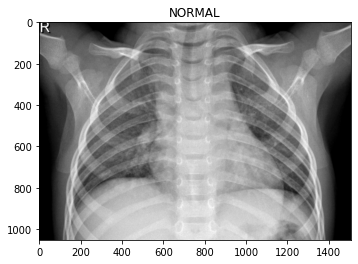

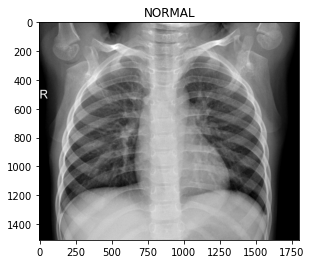

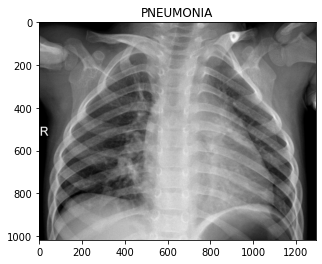

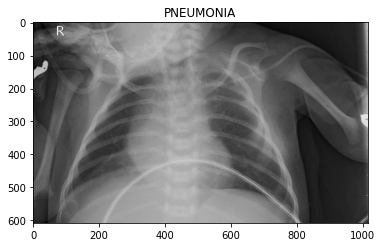

In [11]:
# EFFICIENT NET

from matplotlib import pyplot as plt
from matplotlib import image as mpimg

for dirname, _, filenames in os.walk('train'):
    for i, file in enumerate(filenames):
        if(i > 1):
            break
        plt.imshow(mpimg.imread(os.path.join(dirname, file)), cmap='gray')
        plt.title(dirname.split('/')[1])
        plt.show()

# ***Setting up data for model***

In [12]:
# EFFICIENT NET

from tensorflow.keras.preprocessing.image import ImageDataGenerator

SIZE = 224
BATCH = 64

# image augmentations
image_gen = ImageDataGenerator(rescale=1./255,
                                rotation_range=5,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                validation_split=0.2)

# flow_from_directory generators
train_generator = image_gen\
    .flow_from_directory('train',
                        target_size=(SIZE, SIZE),
                        class_mode="binary",
                        batch_size=BATCH,
                        subset='training')

validation_generator = image_gen\
    .flow_from_directory('train',
                        target_size=(SIZE, SIZE),
                        class_mode="binary",
                        batch_size=BATCH,
                        subset='validation')

test_set = image_gen\
    .flow_from_directory('test',
                        target_size=(SIZE, SIZE),
                        class_mode="binary",
                        batch_size=BATCH,
                        subset='validation')

Found 3748 images belonging to 2 classes.
Found 936 images belonging to 2 classes.
Found 234 images belonging to 2 classes.


# ***Compile VGG16 model***

In [13]:

# from tensorflow.keras.applications import VGG16
from keras.applications import VGG16
from keras.applications import resnet50
from keras.applications import xception
from tensorflow.keras.callbacks import Callback
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.layers import Input

# Callbacks
## Keep the best model
mc = ModelCheckpoint('model.hdf5', 
                     save_best_only=True, 
                     verbose=0, 
                     monitor='val_loss', 
                     mode='min')

## Reduce learning rate if it gets stuck in a plateau
rlr = ReduceLROnPlateau(  monitor='val_loss', 
                          factor=0.3, 
                          patience=3, 
                          min_lr=0.000001, 
                          verbose=1
                        )

# Model
## Define the base model with EfficientNet weights
# model = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
model = xception.Xception(  weights = 'imagenet', 
                include_top = False, 
                input_shape = ( SIZE, SIZE, 3 ) 
              )

## Output layer
x = model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation="relu")(x)
x = Dense(32, activation="relu")(x)
predictions = Dense(1, activation="sigmoid")(x)

## Compile and run
model = Model(inputs=model.input, outputs=predictions)

model.compile(optimizer='adam',
              loss='binary_crossentropy', 
              metrics=['accuracy', Recall(), Precision()])



83689472/83683744 [==============================] - 7s 0us/step


In [14]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

# ***Training Model***

In [15]:

model_history = model.fit(train_generator,
                            validation_data=validation_generator,
                            steps_per_epoch=train_generator.n/BATCH,
                            validation_steps=validation_generator.n/BATCH,
                            epochs=15,
                            verbose=1,
                            callbacks=[mc, rlr])

Epoch 1/15
59/58 [==============================] - 1835s 31s/step - loss: 0.1611 - accuracy: 0.9405 - recall: 0.9081 - precision: 0.9335 - val_loss: 0.6095 - val_accuracy: 0.9562 - val_recall: 0.9602 - val_precision: 0.9624
Epoch 2/15
59/58 [==============================] - 1789s 30s/step - loss: 0.1014 - accuracy: 0.9642 - recall: 0.9654 - precision: 0.9650 - val_loss: 0.7445 - val_accuracy: 0.9081 - val_recall: 0.9701 - val_precision: 0.9620
Epoch 3/15
59/58 [==============================] - 1803s 31s/step - loss: 0.0742 - accuracy: 0.9741 - recall: 0.9743 - precision: 0.9615 - val_loss: 0.1424 - val_accuracy: 0.9199 - val_recall: 0.9728 - val_precision: 0.9643
Epoch 4/15
59/58 [==============================] - 1793s 30s/step - loss: 0.0597 - accuracy: 0.9779 - recall: 0.9726 - precision: 0.9676 - val_loss: 0.4169 - val_accuracy: 0.8707 - val_recall: 0.9699 - val_precision: 0.9696
Epoch 5/15
59/58 [==============================] - 1778s 30s/step - loss: 0.0467 - accuracy: 0.9827

# ***Printing Accuracy and Plot Training Metrics***

In [16]:
test_accu = model.evaluate_generator(test_set,steps=624)
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 98.47140312194824 %


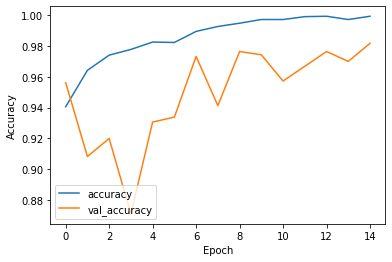

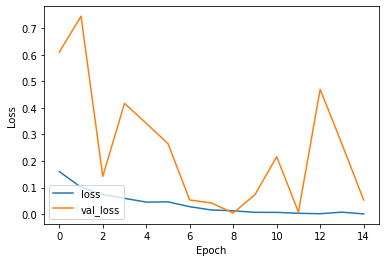

In [17]:
# Evaluate the model

# Accuracy

plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower left')
plt.show()

# Loss
plt.plot(model_history.history['loss'], label='loss')
plt.plot(model_history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.ylim([0.5, 1])
plt.legend(loc='lower left')
plt.show()
